# Unit 5 - Financial Planning

In [149]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [150]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [151]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [152]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [153]:
# Fetch current BTC price
btcr = requests.get(btc_url)
btc_data = btcr.json()
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
ethr = requests.get(eth_url)
eth_data= ethr.json()
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $47073.60
The current value of your 5.3 ETH is $13726.42


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [177]:
# Set current amount of shares data
df_shares = pd.DataFrame(data = [200,50], columns = ['Units'])

# Set the tickers
tickers = ['AGG','SPY']

# Create the shares DataFrame with `tickers` as index
df_shares.index = tickers

# Display shares data
df_shares

,Units
AGG,200
SPY,50


In [178]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [179]:
# Format current date as ISO format
today = pd.Timestamp("2022-03-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker_prices = api.get_bars(tickers, tradeapi.TimeFrame.Day, "2022-03-09", "2022-03-09", adjustment='raw').df

# Preview DataFrame
ticker_prices

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-09 05:00:00+00:00,109.09,109.209,108.93,109.04,9873754,29005,109.05872,AGG
2022-03-09 05:00:00+00:00,425.16,429.510,422.83,427.41,110780810,1086809,426.13040,SPY


In [180]:
# Pick AGG and SPY close prices
close_prices = ticker_prices.reset_index().set_index('symbol')['close']
share_portfolio = pd.concat([df_shares, close_prices], axis = 'columns')
agg_close_price = share_portfolio.iloc[0]["close"]
spy_close_price = share_portfolio.iloc[1]["close"]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $109.04
Current SPY closing price: $427.41


In [181]:
# Compute the current value of shares
share_portfolio['NPV'] = share_portfolio['Units']*share_portfolio['close']
my_agg_value = share_portfolio.iloc[0]["NPV"]
my_spy_value = share_portfolio.iloc[1]["NPV"]
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21370.50
The current value of your 200 AGG shares is $21808.00


### Savings Health Analysis

In [182]:
# Set monthly household income
monthly_income = 12000


# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

assets = ["crypto", "shares"]


# Create savings DataFrame
df_savings = pd.DataFrame(data = [shares, crypto], columns = ["Total"])
df_savings.index = assets

# Display savings DataFrame
df_savings

,Total
crypto,43178.500
shares,60800.017


<AxesSubplot:ylabel='Total'>

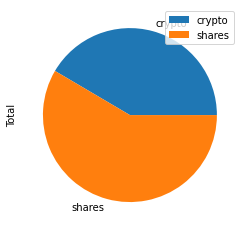

In [183]:
# Plot savings pie chart
df_savings.plot(kind = 'pie', y= 'Total')

In [184]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print("congratulations, you have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("congratulations, you've reached your financial goal")
else:
    print(f"{total_savings-emergency_fund} more savings required to reach your financial goal")

congratulations, you have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [185]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-11', tz='America/New_York').isoformat()

In [186]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

C:\Users\dhaam\anaconda3\envs\dev\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:8: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  


AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2018-03-23 00:00:00-04:00  106.46  106.70  106.46  106.610  2569628  264.16   
2018-03-26 00:00:00-04:00  106.64  106.71  106.47  106.550  4150072  262.13   
2018-03-27 00:00:00-04:00  106.63  106.95  106.61  106.870  2608360  266.17   
2018-03-28 00:00:00-04:00  107.05  107.10  106.88  106.940  3810747  260.75   
2018-03-29 00:00:00-04:00  106.95  107.26  106.95  107.235  5600597  261.10   

                                                              
                             high     low   close     volume  
time                                                          
2018-03-23 00:00:00-04:00  265.02  257.83  258.01  117338697  
2018-03-26 00:00:00-04:00  265.43  259.41  265.17   88386559  
2018-03-27 00:00:00-04:00  266.77  258.84  260.53  102512350  
2018-03-28 00:00:00-04:00  262.64  258.58  259.84  105882176  
2018-03-29 00:00:00-04:00  265.26  260.28  263.49   82896154

In [187]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [188]:
# Printing the simulation input data
MC_thirtyyears.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2018-03-23 00:00:00-04:00  106.46  106.70  106.46  106.610  2569628   
2018-03-26 00:00:00-04:00  106.64  106.71  106.47  106.550  4150072   
2018-03-27 00:00:00-04:00  106.63  106.95  106.61  106.870  2608360   
2018-03-28 00:00:00-04:00  107.05  107.10  106.88  106.940  3810747   
2018-03-29 00:00:00-04:00  106.95  107.26  106.95  107.235  5600597   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-03-23 00:00:00-04:00          NaN  264.16  265.02  257.83  258.01   
2018-03-26 00:00:00-04:00    -0.000563  262.13  265.43  259.41  265.17   
2018-03-27 00:00:00-04:00     0.003003  266.17  266.77  258.84  260.53   
2018-03-28 00:00:00-04:00     0.000655  260.75  262.64  258.58  259.84   
2018-03-29 00:00:00-04:00     0.002759  261.10  265.26  260.28  263.49   

                                                   
                              volume daily_return  
time                                               
2018-03-23 00:00:00-04:00  117338697          NaN  
2018-03-26 00:00:00-04:00   88386559     0.027751  
2018-03-27 00:00:00-04:00  102512350    -0.017498  
2018-03-28 00:00:00-04:00  105882176    -0.002648  
2018-03-29 00:00:00-04:00   82896154     0.014047

In [189]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\dhaam\Documents\Fintech Course\Homework\api_homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990474,1.001608,1.000763,1.007659,1.004337,0.996885,1.008178,1.001463,0.991386,0.998950,...,1.014008,1.003845,1.004357,0.988311,1.012086,1.012585,1.002336,0.995460,0.999276,0.988055
2,1.003533,1.009161,1.009836,1.016244,0.987797,0.986411,1.024111,1.009319,1.010437,1.002986,...,1.027936,0.999120,1.010799,0.986182,1.016523,1.005239,1.000694,0.991324,0.999478,0.989714
3,1.001671,1.014929,1.003297,1.013827,0.980246,0.985973,1.031837,0.996918,1.024551,1.011010,...,1.032881,1.003901,1.027734,0.972936,1.022001,1.007982,0.993889,0.992939,0.986769,1.001485
4,1.002183,1.020265,1.003459,1.010478,0.985816,0.989002,1.045075,1.000684,1.037720,1.009806,...,1.036038,0.992103,1.018893,0.988604,1.026503,1.003117,0.987543,0.990928,1.009842,0.999745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,32.788971,5.865911,5.432106,6.554651,10.821680,12.384381,4.995792,10.435420,10.303824,9.160527,...,10.708143,6.022602,11.883653,6.805951,14.478212,15.490001,3.980572,29.025265,4.729195,16.162460
7557,32.826718,5.828600,5.416771,6.490938,10.937443,12.272244,4.947460,10.376885,10.286927,9.140706,...,10.667582,6.155300,11.656686,6.837772,14.383870,15.295403,4.011745,28.669336,4.779684,16.057659
7558,33.089437,5.839848,5.464348,6.507492,10.833764,12.304200,4.925756,10.517327,10.140715,9.134026,...,10.655579,6.129641,11.624038,6.753435,14.391888,15.451338,4.037345,28.646046,4.797077,16.028335
7559,33.010928,5.859645,5.503524,6.451354,10.684186,12.189424,4.951497,10.566527,9.982398,9.085101,...,10.672165,6.204453,11.495531,6.690767,14.372070,15.321831,4.029654,28.753550,4.846857,15.964113


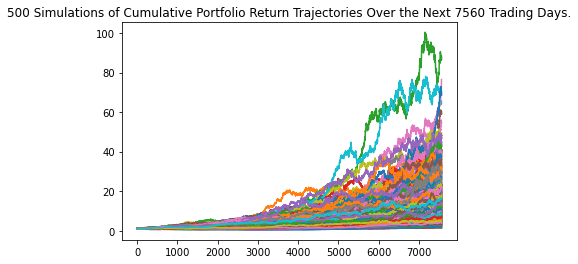

In [190]:
# Plot simulation outcomes
line_plot = MC_thirtyyears.plot_simulation()

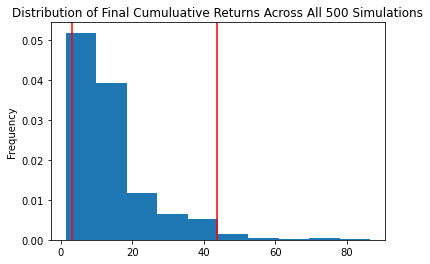

In [191]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyears.plot_distribution()

### Retirement Analysis

In [192]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyears.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean             14.366826
std              11.395898
min               1.361610
25%               7.030653
50%              10.998073
75%              17.191753
max              86.570258
95% CI Lower      2.989259
95% CI Upper     43.635082
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [195]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $59785.19 and $872701.63


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [196]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $89677.78 and $1309052.45


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [197]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [198]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\dhaam\Documents\Fintech Course\Homework\api_homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017071,1.000434,1.007758,0.994908,1.016130,0.997455,1.009021,1.013468,0.997291,0.997068,...,1.004110,1.011862,1.013982,1.009973,1.002913,0.973604,0.969269,0.990614,1.001559,0.993336
2,1.022620,1.004437,1.034539,0.987996,1.007678,1.012981,1.012067,1.026956,1.015450,0.997894,...,1.016146,1.036448,1.016536,1.007473,1.003465,0.973241,0.991639,0.986839,1.011110,0.996773
3,1.015733,0.997197,1.034650,0.984455,1.024054,1.009526,1.011153,1.043979,1.012717,0.998154,...,1.020021,1.046486,1.025280,1.014355,0.997175,0.969657,0.979599,0.996996,1.003163,0.990557
4,1.027328,0.976934,1.026450,0.985617,1.014573,1.023610,1.007667,1.055141,1.015379,1.007308,...,1.022458,1.061574,1.010844,1.010432,0.996868,0.980577,0.966985,1.019747,0.993744,0.976387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.035990,1.600400,2.453090,1.881466,2.291191,1.207364,2.379558,1.772493,1.669006,1.902321,...,2.078021,3.741556,1.390158,2.030243,2.226584,2.254069,2.529908,1.334917,2.517961,2.621066
1257,2.034930,1.608301,2.453717,1.877839,2.287704,1.210419,2.389338,1.757639,1.657550,1.906431,...,2.075217,3.767269,1.413481,2.045111,2.221674,2.261682,2.556045,1.331076,2.501591,2.636795
1258,2.038759,1.592445,2.445492,1.869271,2.277645,1.218933,2.388616,1.775210,1.664758,1.921045,...,2.057886,3.795005,1.415723,2.055175,2.223031,2.261167,2.549722,1.317648,2.507401,2.656561
1259,2.030937,1.587887,2.427469,1.888815,2.254348,1.220862,2.383204,1.771924,1.634433,1.942364,...,2.025357,3.820991,1.421360,2.059341,2.215273,2.256035,2.517520,1.308636,2.504023,2.653430


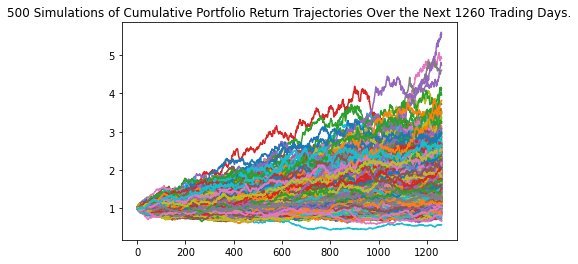

In [200]:
# Plot simulation outcomes
fiveyear_plot = MC_fiveyears.plot_simulation()

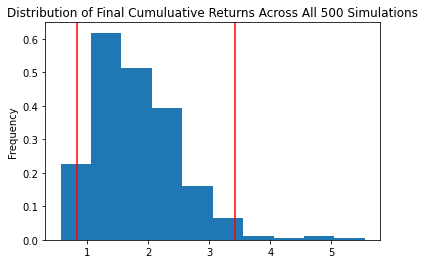

In [201]:
# Plot probability distribution and confidence intervals
fiveyear_dist_plot = MC_fiveyears.plot_distribution()

In [202]:
# Fetch summary statistics from the Monte Carlo simulation results
fiveyear_tbl = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics
print(fiveyear_tbl)

count           500.000000
mean              1.818812
std               0.695736
min               0.566500
25%               1.300849
50%               1.717445
75%               2.232209
max               5.546377
95% CI Lower      0.834974
95% CI Upper      3.426770
Name: 1260, dtype: float64


In [214]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(fiveyear_tbl[8]*initial_investment,2)
ci_upper_five = round(fiveyear_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $50098.42 and $205606.22


### Ten Years Retirement Option

In [205]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [207]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\dhaam\Documents\Fintech Course\Homework\api_homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014922,1.001577,0.996138,0.992106,0.997320,1.014385,1.010703,0.996694,0.992066,1.003791,...,0.993464,1.005879,1.002984,1.009409,0.991982,0.999810,0.992866,1.006126,0.987583,1.000245
2,1.026643,0.996364,0.989162,0.997435,1.004691,1.024540,1.002908,0.989456,0.997161,1.002707,...,0.978466,0.995349,1.006520,1.000467,0.987337,0.998729,0.991593,1.002191,0.980289,1.014358
3,1.027649,0.976710,0.988363,1.007005,0.993835,1.013387,1.003883,0.991955,0.990010,1.013026,...,0.974669,0.991943,1.015757,1.001469,1.009592,1.007244,0.995225,1.002800,0.969455,1.009059
4,1.021942,0.977675,0.990716,0.992123,1.000350,1.031089,1.004910,0.998375,0.981717,1.005396,...,0.984691,0.987456,1.013577,0.996023,1.010280,1.015762,0.992276,1.005760,0.951454,0.997900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.718220,2.442837,2.140669,5.250608,1.290866,3.063452,1.210858,1.569350,0.993852,9.036350,...,2.693067,2.607303,2.851442,1.696873,3.744984,5.324543,1.978406,1.887516,3.001035,3.089671
2517,2.735195,2.435347,2.120215,5.221525,1.307294,3.080651,1.213053,1.575417,0.996829,9.166436,...,2.687764,2.643520,2.823445,1.708426,3.763391,5.294009,1.974939,1.905999,2.997714,3.081026
2518,2.739064,2.445626,2.142445,5.225086,1.321604,3.069327,1.201235,1.553729,1.004119,9.268700,...,2.693054,2.677715,2.797430,1.719375,3.750694,5.327921,1.992165,1.884156,2.982884,3.056945
2519,2.720657,2.480615,2.117529,5.238970,1.296933,3.070999,1.205720,1.568541,1.029565,9.386811,...,2.700612,2.682406,2.796575,1.727835,3.748026,5.302443,1.992003,1.894405,3.004288,3.030354


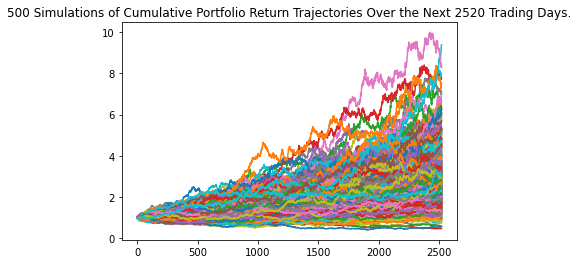

In [208]:
# Plot simulation outcomes
tenyear_line_plot = MC_tenyears.plot_simulation()

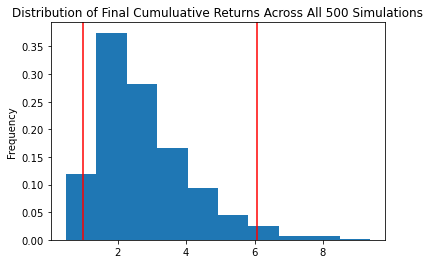

In [209]:
# Plot probability distribution and confidence intervals
tenyear_dist_plot = MC_tenyears.plot_distribution()

In [213]:
# Fetch summary statistics from the Monte Carlo simulation results
tenyear_tbl = MC_tenyears.summarize_cumulative_return()
# Print summary statistics
print(tenyear_tbl)

count           500.000000
mean              2.751064
std               1.368606
min               0.476584
25%               1.759786
50%               2.416036
75%               3.370081
max               9.384993
95% CI Lower      0.971851
95% CI Upper      6.081170
Name: 2520, dtype: float64


In [217]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tenyear_tbl[8]*initial_investment,2)
ci_upper_ten = round(tenyear_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $58311.06 and $364870.22
